## Thuật toán phân nhóm K-means
## K- means clustering

### 1. Cài đặt thuật toán

Cài đặt thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cụm có 500 điểm.

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(X[1:10])
print(original_label)

[[ 3.26689492  2.10376668]
 [ 2.44154982 -0.00829467]
 [ 0.76297667  2.83273067]
 [ 2.71777717  1.72729394]
 [-0.67599807  2.25926478]
 [ 0.59264304  1.67291734]
 [ 2.63732268  1.73032041]
 [ 2.99561739  3.82708705]
 [ 0.45548    -0.37172608]]
[0 0 0 ... 2 2 2]


Hiển thị dữ liệu bằng thư viện matplotlib

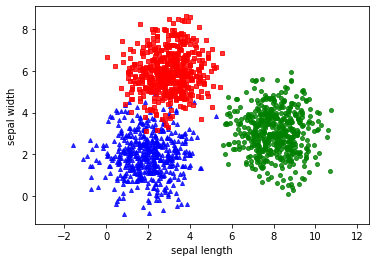

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

Hàm khởi tạo các centroids ban đầu

In [4]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

Hàm tìm label mới cho các điểm dữ liệu khi cố định các centroids

In [5]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

Hàm cập nhật các centroids khi biết label của mỗi điểm dữ liệu

In [6]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

Hàm kiểm tra điều kiện dừng của thuật toán

In [7]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

Thuật toán K-mean

In [8]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[8.02650282 3.06173756]
 [3.01202769 5.99565708]
 [1.96243518 1.97993709]]


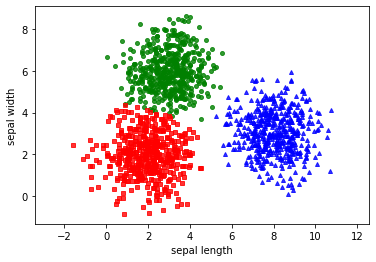

In [9]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

### 2. Sử dụng thư viện sklearn

In [10]:
import numpy as np
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [12]:
label_predict = kmeans.labels_

In [13]:
label_predict

array([2, 2, 2, ..., 0, 0, 0])

In [14]:
kmeans.cluster_centers_

array([[3.01202769, 5.99565708],
       [8.02650282, 3.06173756],
       [1.96243518, 1.97993709]])

In [15]:
original_label

array([0, 0, 0, ..., 2, 2, 2])

In [16]:
count = 0
for i in range(len(label_predict)):
    if label_predict[i] == original_label[i]:
        count = count + 1
print(100*count/len(label_predict),"%")

34.8 %


### 3. Phân loại dữ liệu hoa Iris

1. iris flower datasets là một bộ dữ liệu nhỏ, bao gồm thông tin của ba loài hoa: iris setosa, iris virginica và iris versicolor.
2. Mỗi class gồm có 50 bông hoa với dữ liệu là bốn thông tin.
3. Dữ liệu không phải là ảnh mà là vector đặc trưng bốn chiều.

Cài đặt thư viện

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets

Load data

In [18]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print(iris_X[:5])
print(iris_y[:5])
print("Labels:", np.unique(iris_y))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
Labels: [0 1 2]


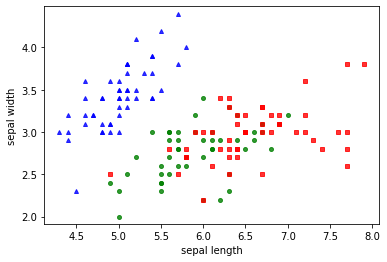

In [19]:
kmeans_display(iris_X, iris_y)

In [20]:
model = KMeans(n_clusters = 3).fit(iris_X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(iris_X)
print(pred_label)

Centers found by scikit-learn:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [21]:
unique1, counts1 = np.unique(iris_y, return_counts=True)
a = dict(zip(unique1, counts1))
unique2, counts2 = np.unique(pred_label, return_counts=True)
b = dict(zip(unique2, counts2))
print(a)
print(b)

{0: 50, 1: 50, 2: 50}
{0: 38, 1: 50, 2: 62}


In [22]:
# 12 điểm bị phân lớp lỗi -> 150 - 12 =138 điểm phân chính xác
print("Độ chính xác",100*138/150,"%")

Độ chính xác 92.0 %


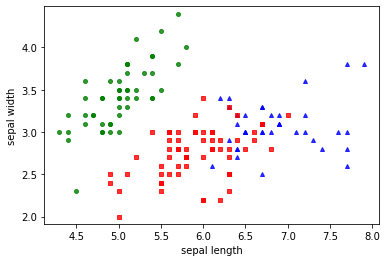

In [23]:
kmeans_display(iris_X, pred_label)

### 4. Phân loại chữ số viết tay mnist 


Bộ dữ liệu chữ số viết tay: MNIST dataset

In [24]:
from sklearn.model_selection import train_test_split
import cv2
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans

Load the MNIST digits dataset

In [25]:
mnist = datasets.load_digits()

In [26]:
print(mnist.data)
print(mnist.target)
print(mnist.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)


In [27]:
X_data_0 = mnist.data[mnist.target == 0]
X_label_0 = mnist.target[mnist.target == 0]
print(X_data_0)
print(X_label_0)
X_data_1 = mnist.data[mnist.target == 1]
X_label_1= mnist.target[mnist.target == 1]
print(X_data_1)
print(X_label_1)

[[0. 0. 5. ... 0. 0. 0.]
 [0. 0. 1. ... 3. 0. 0.]
 [0. 0. 3. ... 4. 0. 0.]
 ...
 [0. 0. 9. ... 4. 0. 0.]
 [0. 0. 5. ... 8. 1. 0.]
 [0. 0. 6. ... 6. 0. 0.]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  1.  0.]
 [ 0.  0.  0. ... 15.  4.  0.]
 ...
 [ 0.  0.  1. ... 10.  0.  0.]
 [ 0.  0.  8. ...  7.  0.  0.]
 [ 0.  0.  6. ...  4.  0.  0.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [28]:
X_data = np.concatenate((X_data_0 , X_data_1), axis = 0)
X_label = np.concatenate((X_label_0 , X_label_1), axis = 0)

In [29]:
print(X_data.shape)
print(X_label.shape)

(360, 64)
(360,)


In [32]:
model = KMeans(n_clusters = 2).fit(X_data)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X_data)
print(pred_label)
print(X_label)

Centers found by scikit-learn:
[[ 0.00000000e+00  2.22222222e-02  4.13888889e+00  1.29500000e+01
   1.12333333e+01  3.06666667e+00  1.05555556e-01  0.00000000e+00
   0.00000000e+00  8.83333333e-01  1.24666667e+01  1.33055556e+01
   1.15388889e+01  1.14277778e+01  1.02222222e+00  0.00000000e+00
   1.47451495e-17  3.76666667e+00  1.42666667e+01  5.38333333e+00
   2.20555556e+00  1.22111111e+01  3.55000000e+00  0.00000000e+00
   7.37257477e-18  5.27222222e+00  1.26722222e+01  1.99444444e+00
   1.61111111e-01  9.13888889e+00  6.44444444e+00  0.00000000e+00
   0.00000000e+00  5.80555556e+00  1.14277778e+01  8.83333333e-01
   7.77777778e-02  8.85555556e+00  7.11111111e+00  0.00000000e+00
   0.00000000e+00  3.45555556e+00  1.31388889e+01  1.63333333e+00
   1.56111111e+00  1.13611111e+01  5.84444444e+00  0.00000000e+00
   0.00000000e+00  7.88888889e-01  1.29111111e+01  9.85000000e+00
   1.03000000e+01  1.32833333e+01  2.46111111e+00 -9.99200722e-16
   0.00000000e+00  5.55555556e-03  4.11111111

In [33]:
count = 0
for i in range(len(X_label)):
    if X_label[i] == pred_label[i]:
        count = count + 1
print("Độ chính xác:", 100* count/len(X_label), "%")
        

Độ chính xác: 99.44444444444444 %
